# Train 训练


In [1]:
# ./scripts/mmdet_train.sh centernet

In [2]:
# gpu for test
gpu_id = 0

# Define params 变量定义


In [2]:
import glob
import os

# params 参数
model_name = 'centernet'
model_stru = ''
model_cfg = ''
img_size = 512
exp_name = f'{model_name}{model_stru}{model_cfg}_{img_size}'

# path 路径
cfg_path = f'cfg/mmdet/{model_name}_{img_size}.py'
best_model_path = f'runs/mmdetection/{exp_name}/train/'
exp_id = max([f for f in os.listdir(best_model_path) if os.path.isdir(os.path.join(best_model_path, f))])  # 最新实验
files = glob.glob(f'{best_model_path}/best_coco_bbox_mAP_epoch_*.pth')  # TODO: 按epoch数排序
best_model_path = files[0] if files else None
train_log_path = f'runs/mmdetection/{exp_name}/train/{exp_id}/vis_data/scalars.json'

print(f'{exp_name=}')
print(f'{best_model_path=}')
print(f'{train_log_path=}')


exp_name='centernet_512'
best_model_path='runs/mmdetection/centernet_512/train/best_coco_bbox_mAP_epoch_311.pth'
train_log_path='runs/mmdetection/centernet_512/train/20240101_140713/vis_data/scalars.json'


# Log 日志分析


['lr', 'data_time', 'grad_norm', 'loss', 'loss_center_heatmap', 'loss_wh', 'loss_offset', 'time', 'iter', 'memory', 'step']
['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time', 'time']
最大map: (311)0.935


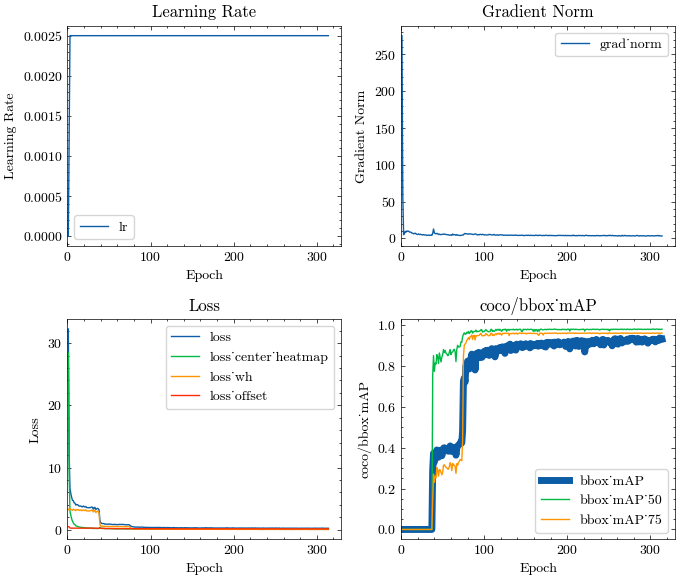

In [4]:
from src.utils.read import read_mmdet_train_log_json
from src.utils.plot import plot_mmdet_centernet_train_log

df_train, df_val = read_mmdet_train_log_json(train_log_path)
plot_mmdet_centernet_train_log(df_train, df_val, exp_name=exp_name)

# Test 测试


In [5]:
! scripts/mmdet_test.sh {cfg_path} {best_model_path} {exp_name} {gpu_id}

06/02 21:45:51 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: None
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;

# Evaluation 评估


In [3]:
# Two methods, should give the same results 提供两种测试评价方案，结果一致
# Method 1: pycocotools
import pandas as pd
from src.utils.metric import coco_metrics_name
from src.utils.metric import cal_coco_metrics

# save results 保存评价结果对象
coco_evals = {}
# save metrics 构造dataframe
all_metrics = {}

# get metrics for each dataset 在各测试集进行推理
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge', 'test_real', 'test']:

    print(f'Evaluating 正在评价: {data_type}')
    annotation_file = f'datasets/lard/annotations/instances_{data_type}.json'
    prediction_file = f'runs/mmdetection/{exp_name}/test/coco_detection/prediction_{data_type}.bbox.json'
    cocoEval = cal_coco_metrics(annotation_file, prediction_file)
    coco_evals[data_type] = cocoEval
    all_metrics[data_type] = cocoEval.stats

all_metrics = pd.DataFrame(all_metrics, index=coco_metrics_name)
display(all_metrics.round(3))


# Method 2: eval_metric.py
# ! python 3rdparty/mmdetection/tools/analysis_tools/eval_metric.py \
#     {cfg_path} \
#     runs/mmdetection/{exp_name}/test/coco_detection/prediction_test_synth.pkl \
#     --cfg-options \
#     test_evaluator.format_only=False

正在评价: test_synth
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.99s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.17s).
Accumulating evaluation results...
DONE (t=1.11s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.801
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.902
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.809
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.832
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.834
 Average Recall     (AR) @[ IoU=0.50:0.95 | are

,test_synth,test_real_nominal,test_real_edge,test_real,test
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.801,0.613,0.218,0.546,0.688
"AP (IoU=0.50, area=all, maxDets=100)",0.959,0.826,0.365,0.747,0.865
"AP (IoU=0.75, area=all, maxDets=100)",0.902,0.706,0.237,0.627,0.782
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.210,0.113,0.193,0.189
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.782,0.560,0.173,0.507,0.645
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.809,0.753,0.281,0.659,0.754
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.832,0.640,0.261,0.574,0.716
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.834,0.646,0.275,0.582,0.721
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.836,0.650,0.285,0.587,0.724
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.253,0.130,0.234,0.234


In [7]:
# from src.utils.plot import plot_pr_curve

# plot_pr_curve(coco_evals, iou_indices=[0, 2, 4, 6, 8], exp_name=exp_name)

# Number of model params 参数量

In [4]:
# ! scripts/mmdet_flops.sh {cfg_path}

import argparse
import importlib
import pandas as pd
from mmengine.logging import MMLogger
module = importlib.import_module("3rdparty.mmdetection.tools.analysis_tools.get_flops")
inference = module.inference

args = argparse.Namespace(
    config=cfg_path,
    num_images=1,
    cfg_options=dict()
)
logger = MMLogger.get_instance(name='MMLogger')
result = inference(args, logger)
split_line = '=' * 30
ori_shape = result['ori_shape']
pad_shape = result['pad_shape']
flops = result['flops']
params = result['params']
compute_type = result['compute_type']

if pad_shape != ori_shape:
    print(f'{split_line}\nUse size divisor set input shape '
            f'from {ori_shape} to {pad_shape}')
print(f'{split_line}\nCompute type: {compute_type}\n'
        f'Input shape: {pad_shape}\nFlops: {flops}\n'
        f'Params: {params}\n{split_line}')

# reconstruct data 数据重构
all_complex = {}
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge', 'test_real', 'test']:
    all_complex[data_type] = [params, flops]  # for data concat 仅为便于数据拼接
all_complex = pd.DataFrame(
    data=all_complex,
    index=['Param', 'FLOPs']
)

# combine metrics 合并复杂度指标
all_metrics = pd.concat([all_metrics, all_complex], axis=0)
all_metrics

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
06/02 23:01:32 - mmengine - WARNING - Unsupported operator aten::max_pool2d encountered 1 time(s)
06/02 23:01:32 - mmengine - WARNING - Unsupported operator aten::add_ encountered 8 time(s)
06/02 23:01:32 - mmengine - WARNING - Unsupported operator aten::sigmoid encountered 4 time(s)
06/02 23:01:32 - mmengine - WARNING - Unsupported operator prim::PythonOp.ModulatedDeformConv2dFunction encountered 3 time(s)
06/02 23:01:32 - mmengine - WARNING - The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
bbox_head.loss_center_heatmap, bbox_head.loss_offset, bbox_head.loss_wh, data_preprocessor
06/02 23:01:32 - mmengine - WARNING - Unsupported opera

,test_synth,test_real_nominal,test_real_edge,test_real,test
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.800950,0.613180,0.217944,0.545799,0.688280
"AP (IoU=0.50, area=all, maxDets=100)",0.959201,0.825779,0.365066,0.746662,0.865296
"AP (IoU=0.75, area=all, maxDets=100)",0.901976,0.706461,0.236701,0.627049,0.781918
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000000,0.209622,0.113457,0.193053,0.188570
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.781593,0.560133,0.173007,0.506877,0.645394
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.808635,0.753317,0.281063,0.658992,0.753837
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.831510,0.639667,0.260772,0.574213,0.716107
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.834358,0.646000,0.274920,0.582054,0.721129
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.835579,0.649533,0.284566,0.586858,0.723863
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000000,0.252976,0.130000,0.234343,0.234343


# Speed 测速


In [9]:
! scripts/mmdet_speed.sh {cfg_path} {best_model_path} {gpu_id}

06/02 21:58:36 - mmengine - INFO - before build: 
06/02 21:58:36 - mmengine - INFO - (GB) mem_used: 6.46 | uss: 0.29 | pss: 0.40 | total_proc: 1
Loads checkpoint by local backend from path: runs/mmdetection/centernet_512/train/best_coco_bbox_mAP_epoch_311.pth
06/02 21:58:36 - mmengine - INFO - ModulatedDeformConvPack neck.deconv_layers.0.conv is upgraded to version 2.
06/02 21:58:36 - mmengine - INFO - ModulatedDeformConvPack neck.deconv_layers.2.conv is upgraded to version 2.
06/02 21:58:36 - mmengine - INFO - ModulatedDeformConvPack neck.deconv_layers.4.conv is upgraded to version 2.
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
06/02 21:58:36 - mmengine - INFO - after build: 
06/02 21:58:36 - mmengine - INFO - (GB) mem_used: 6.62 | uss: 0.45 | pss: 0.56 | total_proc: 1
06/02 22:00:04 - mmengine - INFO - ==================================
06/02 22:00:04 - mmengine - INFO - Done image [500/2000], fps: 23.2 img/s, times per image: 43.1 ms/img, cuda 

In [ ]:
# 06/02 22:04:24 - mmengine - INFO - ============== Done ==================
# 06/02 22:04:24 - mmengine - INFO - Overall fps: 23.3 img/s, times per image: 42.9 ms/img

# 06/02 22:09:23 - mmengine - INFO - ============== Done ==================
# 06/02 22:09:23 - mmengine - INFO - Overall fps: 22.8 img/s, times per image: 43.9 ms/img

# 06/02 22:10:33 - mmengine - INFO - ============== Done ==================
# 06/02 22:10:33 - mmengine - INFO - Overall fps: 21.3 img/s, times per image: 46.9 ms/img

# 06/02 22:16:33 - mmengine - INFO - ============== Done ==================
# 06/02 22:16:33 - mmengine - INFO - Overall fps: 23.0 img/s, times per image: 43.5 ms/img

# 06/02 22:22:24 - mmengine - INFO - ============== Done ==================
# 06/02 22:22:24 - mmengine - INFO - Overall fps: 23.2 img/s, times per image: 43.1 ms/img

In [5]:
# save results 保存结果
all_speed = {
    'test_synth': [42.9, 23.3],  # [average_time, fps]
    'test_real_nominal': [43.9, 22.8],
    'test_real_edge': [46.9, 21.3],
    'test_real': [43.5, 23.0],
    'test': [43.1, 23.2]
}

# create df 构建dataframe
all_speed = pd.DataFrame(
    data=all_speed,
    index=['Time', 'FPS']
)

# conbine metrics 合并测试指标
all_metrics = pd.concat([all_metrics, all_speed], axis=0)
all_metrics

,test_synth,test_real_nominal,test_real_edge,test_real,test
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.800950,0.613180,0.217944,0.545799,0.688280
"AP (IoU=0.50, area=all, maxDets=100)",0.959201,0.825779,0.365066,0.746662,0.865296
"AP (IoU=0.75, area=all, maxDets=100)",0.901976,0.706461,0.236701,0.627049,0.781918
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000000,0.209622,0.113457,0.193053,0.188570
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.781593,0.560133,0.173007,0.506877,0.645394
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.808635,0.753317,0.281063,0.658992,0.753837
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.831510,0.639667,0.260772,0.574213,0.716107
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.834358,0.646000,0.274920,0.582054,0.721129
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.835579,0.649533,0.284566,0.586858,0.723863
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000000,0.252976,0.130000,0.234343,0.234343


In [6]:
all_metrics.index.name = 'metrics'
all_metrics.to_csv(
    f'results/tables/metrics/baseline/metrics_baseline_{exp_name}.csv', 
    float_format='%.3f')

# Write detections to 51 写入检测结果

In [ ]:
# from src.utils.database import write_detections_2_database
# write_detections_2_database(lib_type='mmdetection', exp_name=exp_name)


In [ ]:
# from src.utils.database import delete_detections_from_database
# delete_detections_from_database(exp_name=exp_name)
